<a href="https://colab.research.google.com/github/nowshaba/Transferlearning/blob/main/mlp%2Csvm%2Clstm_CICIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import time
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
df=pd.read_csv("/content/drive/MyDrive/Datasets/CIC_IDSCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
drop_cols = []
for i in df.columns:
    if len(df[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df.drop(drop_cols, 1, inplace=True)

Total columns with only 1 unique value: 10


In [ ]:
df.dropna(1,inplace=True)

In [ ]:
df[[' Flow Packets/s']] = df[[' Flow Packets/s']].apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()

# Packet Attack Distribution
train[' Label'].value_counts()
test[' Label'].value_counts()

DDoS      38220
BENIGN    29504
Name:  Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float32','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float32','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float32','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

# creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train[' Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test[' Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]


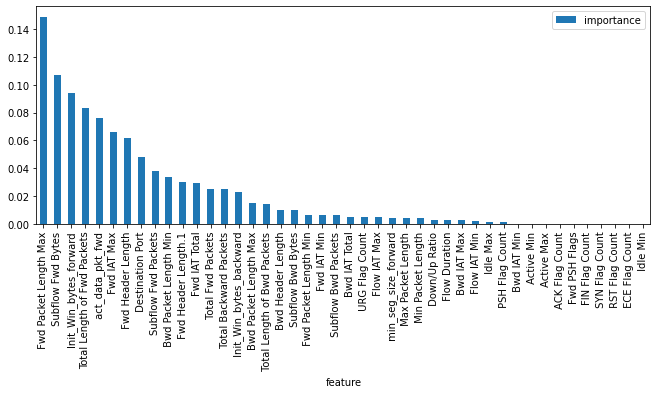

In [ ]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_X, train_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(train_X, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

a = [i[0] for i in feature_map]
train_X = train_X.iloc[:,a]
test_X = test_X.iloc[:,a]


In [ ]:
#Dataset Partition
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70, random_state=2)

In [ ]:

def model_values(lstm,lstmh,mlp,sup,X_test,Y_test):
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,classification_report,roc_curve
  print("********LSTM MODEL EVALUATION*********")
  print()
  print("Lstm accuracy is:", lstmh.history['accuracy'])
  print("Lstm loss is:", lstmh.history['loss'])

  y_pred = (lstm.predict(X_test).ravel()>0.5)+0 # predict and get class (0 if pred < 0.5 else 1)
  confusion_matrix = confusion_matrix(Y_test, y_pred)
  print("Confusion Matrix for LSTM model:", confusion_matrix)
  print()
  
  models = []
  models.append(('Multi layer perceptron',mlp))
  models.append(('Support vector machine Classifier',sup))

  for i,m in models:
    accuracy = sklearn.metrics.accuracy_score(Y_test, m.predict(X_test))
    confusion_matrix = sklearn.metrics.confusion_matrix(Y_test, m.predict(X_test))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Model Accuracy :" "\n", accuracy)
    print()
    print("Confusion matrix :" "\n", confusion_matrix)
    print()
  
  

In [ ]:

def train_model(X_newtrain,Y_newtrain,X_test,Y_test):
  import sklearn.metrics 
  from sklearn.model_selection import cross_val_score
  from sklearn import svm
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
  import tensorflow as tf
  from tensorflow import keras
  from tensorflow.keras import layers
  from sklearn.neural_network import MLPClassifier
  from time import time
  print('*** MULTI LAYER PERCEPTRON ***')
  print()
  start1= time()
  mlp = MLPClassifier(warm_start=True,
  learning_rate='adaptive', early_stopping=True)

  mlp.fit(X_newtrain, Y_newtrain)
  print("Time taken to create and train MLP Model:", time()-start1, "secs")
  print()

  print('*** Support Vector Machine ***')
  print()
  #Create a svm Classifier
  start2=time()
  sup = svm.SVC(kernel='linear') # Linear Kernel

  #Train the model using the training sets
  sup.fit(X_newtrain, Y_newtrain)
  print("Time taken to create and train SVM :", time()-start2, "secs")
  print()

  print("********LSTM Model********")
  print()
#X_train = np.expand_dims(X_train, 1)
#X_train = X_train.reshape(len(X_train), 1, X_train.shape[1])
  start3=time()
  lstm = Sequential()
  lstm.add(layers.LSTM(200, input_shape=(20,1), return_sequences=True, activation='sigmoid'))
#lstm.add(Dropout(0.1))
#lstm.add(BatchNormalization())

  lstm.add(layers.LSTM(units=200,return_sequences=False, activation='sigmoid'))
#lstm.add(Dropout(0.1))
#lstm.add(BatchNormalization())

  lstm.add(layers.Dense(activation='sigmoid', units=1))
#model.add(Dropout(0.1))

  #print('Compiling...')
  #print()
#adam=tf.keras.optimizers.Adam(lr='adaptive')
  lstm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
  #lstm.summary()
  lstmh = lstm.fit(X_newtrain, Y_newtrain)
#print(" Predicting ".center(termwidth,fillchar))
  print("Time taken to create and train LSTM Model:", time()-start3, "secs")
  print()
  model_values(lstm,lstmh,mlp,sup,X_test,Y_test)

In [ ]:
#Dividing the training data into smaller parts for results
size = 0.10
while(size<1.0):
   X_newtrain,X_ntest,Y_newtrain,Y_ntest = train_test_split(X_train,Y_train, train_size= size, random_state=2)
   print("***********MODEL PERFORMANCE EVALUATION ON", int(size*100) ,"% TRAINING DATA")
   train_model(X_newtrain,Y_newtrain,X_test,Y_test)
   size = (size+0.10)
else:
   if(size==1.0):
      print("***********MODEL PERFORMANCE EVALUATION ON", int(size*100) ,"% TRAINING DATA")
      train_model(X_train,Y_train,X_test,Y_test)



***********MODEL PERFORMANCE EVALUATION ON 10 % TRAINING DATA
*** MULTI LAYER PERCEPTRON ***

Time taken to create and train MLP Model: 1.775747537612915 secs

*** Support Vector Machine ***

Time taken to create and train SVM : 0.3098874092102051 secs

********LSTM Model********

346/346 [==============================] - 27s 73ms/step - loss: 0.6895 - accuracy: 0.5552
Time taken to create and train LSTM Model: 29.38602900505066 secs

********LSTM MODEL EVALUATION*********

Lstm accuracy is: [0.5551939010620117]
Lstm loss is: [0.6894720196723938]
Confusion Matrix for LSTM model: [[27022     0]
 [20385     0]]

============================== Multi layer perceptron Model Evaluation ==============================

Model Accuracy :
 0.9976585736283671

Confusion matrix :
 [[26989    33]
 [   78 20307]]


============================== Support vector machine Classifier Model Evaluation ==============================

Model Accuracy :
 0.9870483261965532

Confusion matrix :
 [[26992    30]
